# Logistic Regression on Titanic dataset

In [4]:
import pandas as pd
import numpy as np

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Survived = 0 means he/she is not survived
Survived = 1 means he/she is survived

SibSp means siblings or spouse

Parch means Parent or child

In [18]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


# Exploratory data analysis

Since there is null values we can use a heatmap to view the details


<Axes: >

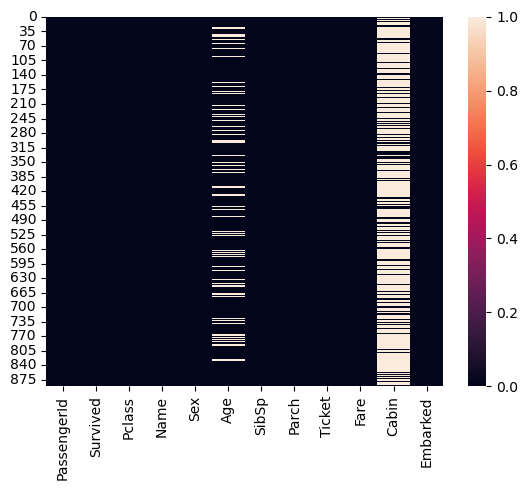

In [29]:
sns.heatmap(df.isnull())

<Axes: >

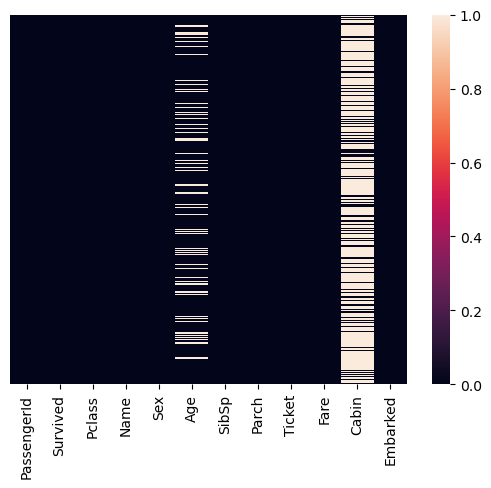

In [31]:
sns.heatmap(df.isnull(), yticklabels=False)

Now we can understand Age column and cabin column have null values.

<Axes: xlabel='Survived', ylabel='count'>

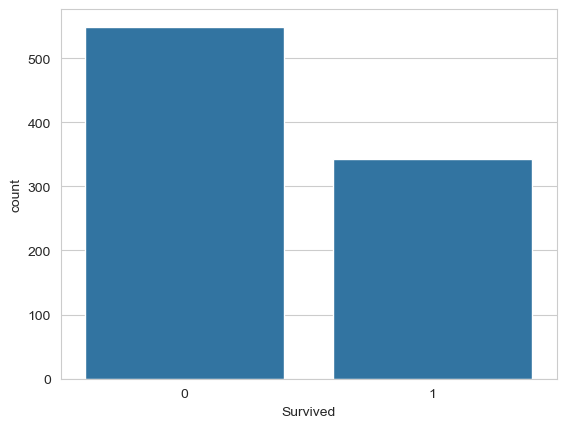

In [48]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived',data = df)

Number of people survived is less than number of people died.

<Axes: xlabel='Survived', ylabel='count'>

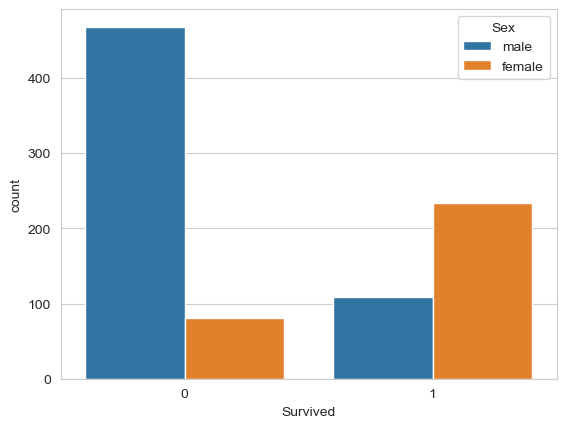

In [50]:
sns.countplot(x = 'Survived',data = df, hue = 'Sex')

More Females are survived.

<Axes: xlabel='Survived', ylabel='count'>

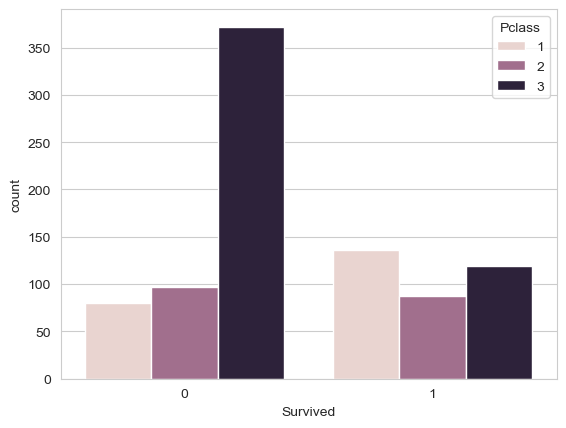

In [59]:
sns.countplot(x = 'Survived',data = df, hue = 'Pclass')

Majority of the peoples in the 3rd class didn't make it.

<Axes: ylabel='Frequency'>

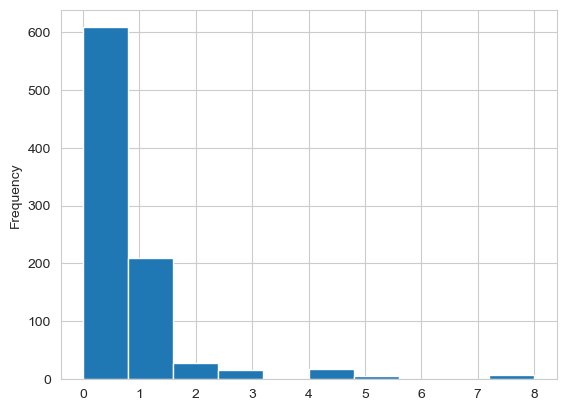

In [56]:
df['SibSp'].plot.hist()

Most of the peoples in titanic was solo passengers.

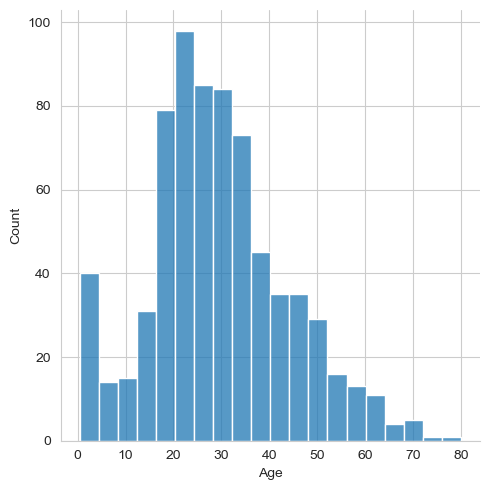

In [66]:
sns.displot(df['Age'])

<Axes: >

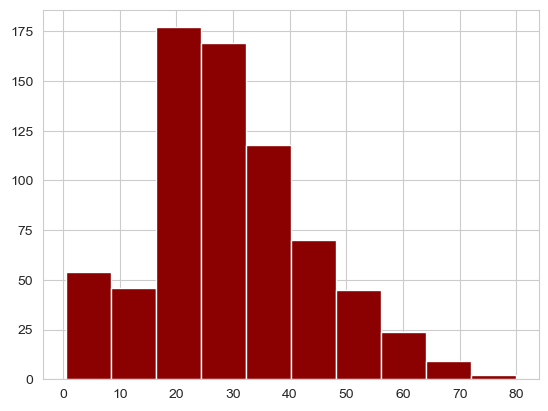

In [74]:
df['Age'].hist(color = 'darkred')

Most of the passengers were youngsters.

<Axes: >

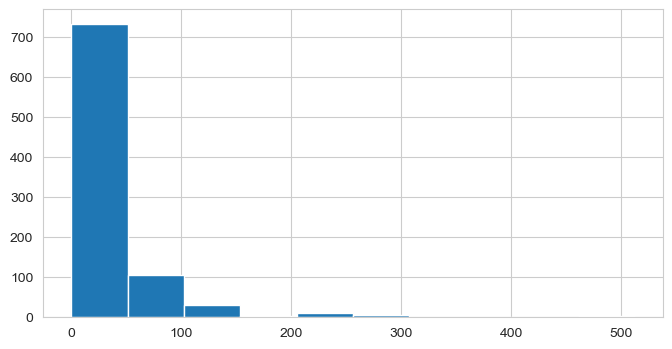

In [90]:
df['Fare'].hist(figsize = (8,4))

Majority of the passengers paid between 0 and 100

In [82]:
import cufflinks as cf
cf.go_offline()

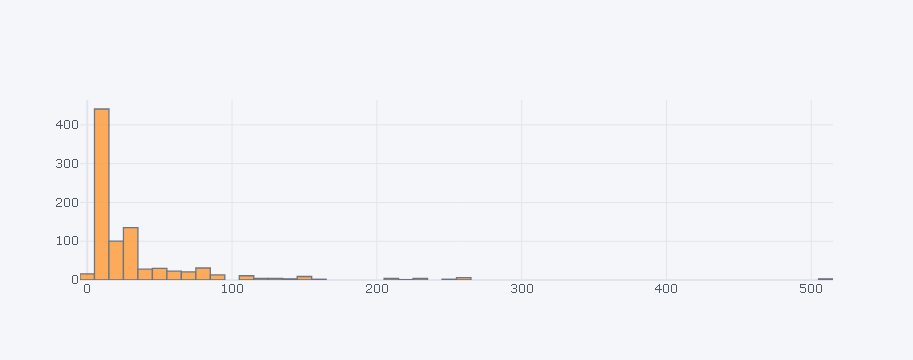

In [92]:
df['Fare'].iplot(kind = 'hist')

# Cleaning dataset

<Axes: >

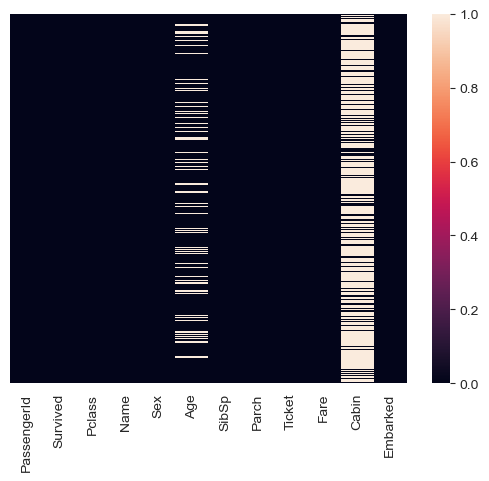

In [99]:
sns.heatmap(df.isnull(), yticklabels=False)

We are trying to fill the age column with mean values

<Axes: xlabel='Pclass', ylabel='Age'>

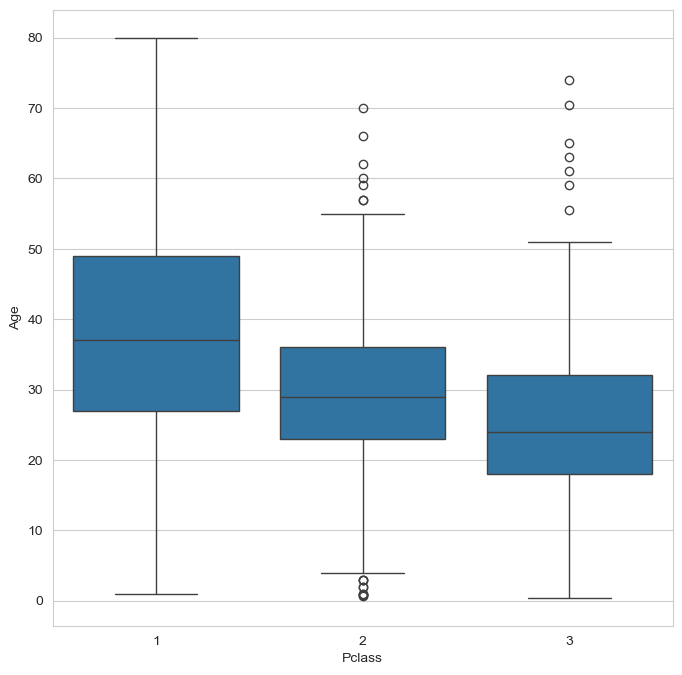

In [114]:
plt.figure(figsize=(8,8))
sns.boxplot(x = 'Pclass', y = 'Age', data=df)

From this we can understand that the mean age of the person in 1st class is 37, 2nd class is 29, 3rd class is 24

In [130]:
def impute_age(row):
    age = row.iloc[0]
    pclass = row.iloc[1]
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

In [138]:
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis=1) #Axis 1 means column

<Axes: >

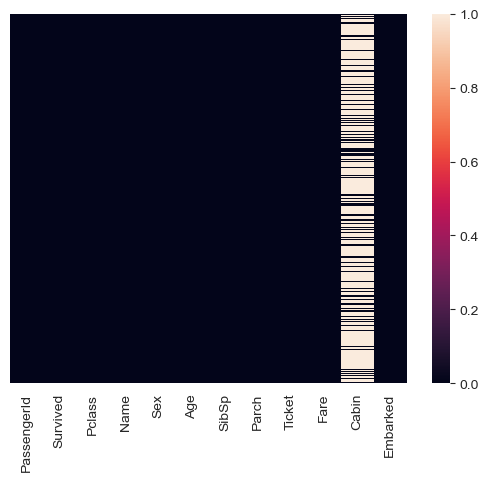

In [134]:
sns.heatmap(df.isnull(), yticklabels=False)

In [136]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Since almost 90% of the cabin values are null we are droping that column

In [143]:
df.drop('Cabin', axis=1, inplace=True)

<Axes: >

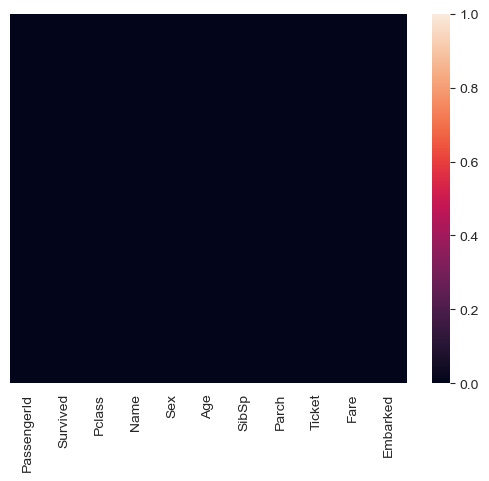

In [145]:
sns.heatmap(df.isnull(), yticklabels=False)

# Converting categorical features

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [152]:
pd.get_dummies(df['Sex'])


,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


According to our dataset if male is false then it will be female.

In [154]:
pd.get_dummies(df['Sex'], drop_first=True)

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [157]:
sex = pd.get_dummies(df['Sex'], drop_first=True)

In [161]:
embark = pd.get_dummies(df['Embarked'], drop_first=True)

In [165]:
df = pd.concat([df, sex, embark], axis=1)

In [167]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True


In [171]:
df.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [173]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True
